In [1]:
from pathlib import Path

import plotly as pl
import plotly.express
import plotly.io
import numpy as np
import pandas as pd
import seaborn as sb

sb.set()
sb.set_style('whitegrid')
# Render plotly plots as static images to be displayed on Github
pl.io.renderers.default = 'svg'

from pysimple.io import from_tsv

In [2]:
DATA_DIR = Path('/mnt/storage/tas/data/xeno-canto')

### Record columns 

```
id: the catalogue number of the recording on xeno-canto
gen: the generic name of the species (genus)
sp: the specific name (epithet) of the species (species)
ssp: the subspecies name (subspecific epithet)
en: the English name of the species
rec: the name of the recordist
cnt: the country where the recording was made
loc: the name of the locality
lat: the latitude of the recording in decimal coordinates
lng: the longitude of the recording in decimal coordinates
type: the sound type of the recording (e.g. 'call', 'song', etc). This is generally a comma-separated list of sound types.
url: the URL specifying the details of this recording
file: the URL to the audio file
file-name: the original file name of the audio file
sono: an object with the urls to the four versions of sonograms
lic: the URL describing the license of this recording
q: the current quality rating for the recording
length: the length of the recording in minutes
time: the time of day that the recording was made
date: the date that the recording was made
uploaded: the date that the recording was uploaded to xeno-canto
also: an array with the identified background species in the recording
rmk: additional remarks by the recordist
bird-seen: was the recorded bird visually identified? (yes/no)
playback-used: was playback used to lure the bird? (yes/no)
```

In [3]:
records_path = DATA_DIR / 'records' / 'records.tsv'
records = from_tsv(records_path, usecols='gen,sp,cnt,loc,lat,lng,type,q,length,time,date'.split(','))

### Countries

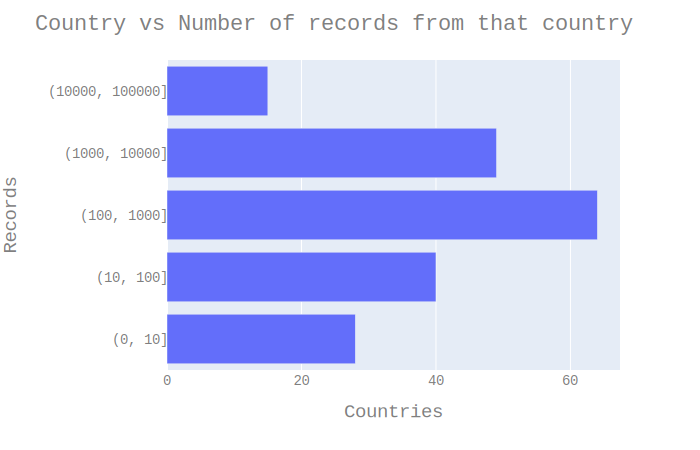

In [4]:
data = pd.cut(records['cnt'].value_counts(), bins=[0, 10, 100, 1000, 10000, 100000]).value_counts()
data = data.sort_index().reset_index().rename(columns={'cnt': 'Countries', 'index': 'Records'})
data['Records'] = data['Records'].astype(str)

fig = pl.express.bar(data, x='Countries', y='Records', orientation='h')
fig.update_layout(
    title='Country vs Number of records from that country',
    width=800,
    height=200,
    xaxis=dict(tickangle=0, tickfont=dict(size=14), title='Countries'),
    yaxis=dict(tickfont=dict(size=14), title='Records'),
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()

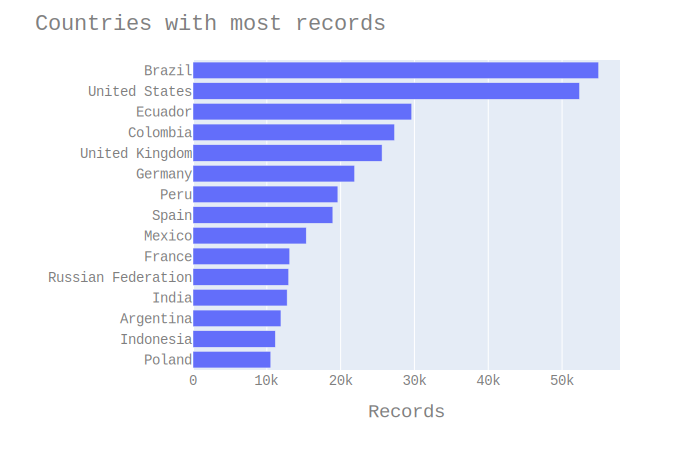

In [5]:
records['cntRecords'] = records['cnt'].map(records['cnt'].value_counts())
data = records.drop_duplicates('cnt').query('10000 < cntRecords <= 100000')[['cnt', 'cntRecords']].sort_values('cntRecords')

fig = pl.express.bar(data, x='cntRecords', y='cnt', orientation='h')
fig.update_layout(
    title='Countries with most records',
    width=800,
    height=400,
    xaxis=dict(tickfont=dict(size=14), title='Records'),
    yaxis=dict(tickfont=dict(size=14), title=''),
    font=dict(family='Courier New, monospace', size=16, color='#7f7f7f')
)
fig.show()